# Walkthrough the 60 min beginner tutorial on PyTorch docs page

*NOTE: the code runs on CPU, and some sections in tutorial are CPU only*

[https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)



In [1]:
import torch
import numpy as np

## Section 1 - Tensors

### Tensor initialization

From data directly, from NP array, from another tensor

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9725, 0.9884],
        [0.4072, 0.1103]]) 



In [3]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4562, 0.3926, 0.9336],
        [0.4022, 0.8648, 0.9204]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [4]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more are comprehensively described here [https://pytorch.org/docs/stable/torch.html](https://pytorch.org/docs/stable/torch.html).

Each of them can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook Settings.

In [5]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")
else:
    print("nope")

nope


In [6]:
# testing some functions - basically numpy
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Joining tensors You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from torch.cat.

In [7]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [8]:
# multiplying

# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
# This computes the matrix multiplication between two tensors


print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


## In-place operations

Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.

## NOTE

In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.

In [10]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Bridge with Numpy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.


In [11]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [12]:
# A change in the tensor reflects in the NumPy array.


t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## Section 2 - A Gentle Introduction to torch.autograd

torch.autograd is PyTorch’s automatic differentiation engine that powers neural network training

(...)

Let’s take a look at a single training step. For this example, we load a pretrained resnet18 model from torchvision. We create a random data tensor to represent a single image with 3 channels, and height & width of 64, and its corresponding label initialized to some random values. Label in pretrained models has shape (1,1000).

*This tutorial works only on the CPU and will not work on GPU devices (even if tensors are moved to CUDA).*


In [13]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 119MB/s] 


Next, we run the input data through the model through each of its layers to make a prediction. This is the forward pass.

In [14]:
prediction = model(data) # forward pass

We use the model’s prediction and the corresponding label to calculate the error (loss). The next step is to backpropagate this error through the network. Backward propagation is kicked off when we call .backward() on the error tensor. Autograd then calculates and stores the gradients for each model parameter in the parameter’s .grad attribute.

In [15]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and momentum of 0.9. We register all the parameters of the model in the optimizer.

In [16]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Finally, we call .step() to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in .grad.

In [17]:
optim.step() #gradient descent

At this point, you have everything you need to train your neural network. The below sections detail the workings of autograd - feel free to skip them.

### Differentiation in Autograd

Let’s take a look at how autograd collects gradients. We create two tensors a and b with requires_grad=True. This signals to autograd that every operation on them should be tracked.

We create another tensor Q from a and b.

In [18]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2



Let’s assume a and b to be parameters of an NN, and Q to be the error. In NN training, we want gradients of the error w.r.t. parameters

When we call .backward() on Q, autograd calculates these gradients and stores them in the respective tensors’ .grad attribute.

We need to explicitly pass a gradient argument in Q.backward() because it is a vector. gradient is a tensor of the same shape as Q, and it represents the gradient of Q w.r.t. itself, i.e.

dQ/dQ =1

Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like Q.sum().backward().

In [19]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [20]:
print(a.grad, b.grad)

# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([36., 81.]) tensor([-12.,  -8.])
tensor([True, True])
tensor([True, True])


## Section 3 - Neural Networks

Neural networks can be constructed using the torch.nn package.

Now that you had a glimpse of autograd, nn depends on autograd to define models and differentiate them. An nn.Module contains layers, and a method forward(input) that returns the output.

For example, look at this network that classifies digit images (SEE SITE https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)


It is a simple feed-forward network. It takes the input, feeds it through several layers one after the other, and then finally gives the output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)

- Iterate over a dataset of inputs

- Process input through the network

- Compute the loss (how far is the output from being correct)

- Propagate gradients back into the network’s parameters

- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient


### Define the network



In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

The learnable parameters of a model are returned by net.parameters()

In [22]:
params = list(net.parameters())
#print(params)
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


Let’s try a random 32x32 input. Note: expected input size of this net (LeNet) is 32x32. To use this net on the MNIST dataset, please resize the images from the dataset to 32x32.

In [23]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0147, -0.0720,  0.0024, -0.0828,  0.1413, -0.0927, -0.0230,  0.1591,
         -0.0612,  0.0617]], grad_fn=<AddmmBackward0>)


Zero the gradient buffers of all parameters and backprops with random gradients:

In [24]:
net.zero_grad()
out.backward(torch.randn(1, 10))

print(out)  # ? this still hasnt changed compared to previous values ???

tensor([[-0.0147, -0.0720,  0.0024, -0.0828,  0.1413, -0.0927, -0.0230,  0.1591,
         -0.0612,  0.0617]], grad_fn=<AddmmBackward0>)


### Note

torch.nn only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.

If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.


---

## Loss function

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different loss functions under the nn package . A simple loss is: nn.MSELoss which computes the mean-squared error between the output and the target.

For example:

In [25]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6297, grad_fn=<MseLossBackward0>)


In [26]:
#print(loss.grad_fn.next_functions)

In [27]:
#!pip install torchviz

# can use torchview instead seems more updated

In [28]:
#from torchviz import make_dot, make_dot_from_trace

FOUND THIS LINK ONLINE ALSO:

https://github.com/pytorch/pytorch/blob/e3cde685340d2c5c752428b37449ba75f59488af/tools/autograd/derivatives.yaml

So, when we call loss.backward(), the whole graph is differentiated w.r.t. the neural net parameters, and all Tensors in the graph that have requires_grad=True will have their .grad Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:


In [29]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop

To backpropagate the error all we have to do is to loss.backward(). You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

Now we shall call loss.backward(), and have a look at conv1’s bias gradients before and after the backward.

In [30]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0109,  0.0098,  0.0174,  0.0022, -0.0028,  0.0035])


### Update the weights

The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

weight = weight - learning_rate * gradient

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: torch.optim that implements all these methods. Using it is very simple:

In [31]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

Observe how gradient buffers had to be manually set to zero using optimizer.zero_grad(). This is because gradients are accumulated as explained in the Backprop section.

## Section 4 - Training a Classifier

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

### Training an image classifier

We will do the following steps in order:

Load and normalize the CIFAR10 training and test datasets using torchvision

Define a Convolutional Neural Network

Define a loss function

Train the network on the training data

Test the network on the test data

In [32]:
# Load and normalize CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

In [33]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 40278122.26it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


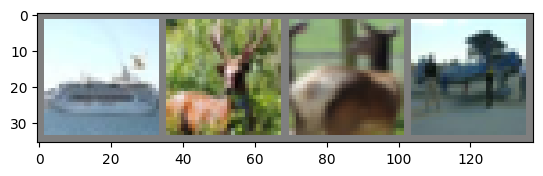

ship  deer  deer  plane


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

2. Define a Convolutional Neural Network

Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel images as it was defined).

In [35]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [36]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [37]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1,  2000] loss: 2.263
[1,  4000] loss: 1.936
[1,  6000] loss: 1.704
[1,  8000] loss: 1.603
[1, 10000] loss: 1.540
[1, 12000] loss: 1.476


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[2,  2000] loss: 1.409
[2,  4000] loss: 1.424
[2,  6000] loss: 1.356
[2,  8000] loss: 1.328
[2, 10000] loss: 1.309
[2, 12000] loss: 1.289
Finished Training


In [ ]:
# save model

#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)

5. Test the network on the test data

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

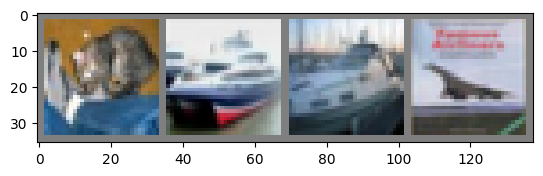

GroundTruth:  cat   ship  ship  plane


In [38]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [42]:
# Okay, now let us see what the neural network thinks these examples above are

outputs = net(images)

print(outputs)
# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network thinks that the image is of the particular class.
# So, let’s get the index of the highest energy:


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

tensor([[-1.5171, -3.0752,  1.5880,  2.4373,  0.9262,  1.3828,  1.6944, -1.3568,
         -0.8895, -2.2017],
        [ 4.6745,  5.5957, -0.9304, -2.3928, -3.4243, -3.7189, -3.4913, -4.3354,
          7.3037,  4.8339],
        [ 1.5467,  2.5091, -0.5914, -0.8479, -1.5594, -1.6997, -1.2346, -2.3341,
          3.4106,  2.2130],
        [ 3.0916,  1.5294,  0.0578, -1.3046, -0.6175, -2.6656, -1.8632, -2.8194,
          5.2217,  1.3178]], grad_fn=<AddmmBackward0>)
Predicted:  cat   ship  ship  ship 


The results seem pretty good.

Let us look at how the network performs on the whole dataset.

In [43]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [44]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 38.0 %
Accuracy for class: car   is 53.1 %
Accuracy for class: bird  is 24.7 %
Accuracy for class: cat   is 45.3 %
Accuracy for class: deer  is 62.0 %
Accuracy for class: dog   is 34.5 %
Accuracy for class: frog  is 64.1 %
Accuracy for class: horse is 66.3 %
Accuracy for class: ship  is 82.0 %
Accuracy for class: truck is 62.1 %


Okay, so what next?

How do we run these neural networks on the GPU?

Training on GPU
Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU.

Let’s first define our device as the first visible cuda device if we have CUDA available:

In [45]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
